In [1]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

messages = [AIMessage(content=f"So you said you were researching ocean mamals", name="Model")]
messages.extend([HumanMessage(content=f"Yes, that's right.", name="Lance")])
messages.extend([AIMessage(content=f"Great, what would you like to learn about.", name="Model")])
messages.extend([HumanMessage(content=f"I want to learn about the best place to see Orcas in the US.", name="Lance")])

for m in messages:
    m.pretty_print()


================================== Ai Message ==================================
Name: Model

So you said you were researching ocean mamals
================================ Human Message =================================
Name: Lance

Yes, that's right.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about.
================================ Human Message =================================
Name: Lance

I want to learn about the best place to see Orcas in the US.


In [2]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("GOOGLE_API_KEY")
_set_env("HF_TOKEN")

In [3]:
from langchain.chat_models import init_chat_model

chat_model = init_chat_model("gemini-2.0-flash", model_provider="google_genai")

In [4]:
messages = [
    SystemMessage(content="You're a helpful assistant"),
    HumanMessage(
        content="What happens when an unstoppable force meets an immovable object?"
    ),
]

ai_msg = chat_model.invoke(messages)

In [6]:
ai_msg.content

'The classic riddle of what happens when an unstoppable force meets an immovable object is a paradox, and there\'s no definitive answer in the real world because both concepts are theoretical impossibilities. Here\'s a breakdown of why it\'s a paradox and some of the common ways people try to resolve it:\n\n**Why it\'s a Paradox:**\n\n*   **Contradiction:** The very existence of one negates the possibility of the other. If there\'s truly an unstoppable force, then by definition, there can be no immovable object. Conversely, if there\'s a truly immovable object, then there can be no unstoppable force.\n*   **Laws of Physics:** Both concepts break the known laws of physics.\n    *   **Unstoppable Force:** Implying infinite energy, which violates the law of conservation of energy.\n    *   **Immovable Object:** Implying infinite density or mass, which also has no basis in reality and would likely create a black hole.\n\n**Common Ways to "Resolve" the Paradox (Philosophical and Theoretical

In [6]:
result = chat_model.invoke(messages)
result

AIMessage(content='This is a classic paradox, and the answer depends on how you approach it:\n\n**The Short, Simple Answer: The paradox reveals a flaw in the initial assumptions.**\n\n**The Longer, More Detailed Explanations:**\n\nHere\'s why it\'s a paradox and how to think about it:\n\n*   **The Problem with the Definition:** The paradox hinges on the absolute nature of "unstoppable" and "immovable." If something is *truly* unstoppable, by definition, it cannot be stopped. Similarly, if something is *truly* immovable, it cannot be moved. The existence of one negates the possibility of the other.\n\n*   **Resolutions (Attempting to Resolve the Paradox):**\n\n    *   **The Laws of Physics Must Change:** If such a scenario were to occur, the laws of physics as we understand them would have to break down or be redefined at the point of impact. This is because our current understanding of physics doesn\'t allow for absolutes like truly unstoppable forces or perfectly immovable objects.\n\

In [7]:
result.response_metadata

{'prompt_feedback': {'block_reason': 0, 'safety_ratings': []},
 'finish_reason': 'STOP',
 'safety_ratings': []}

In [8]:
def multiply(a: int, b:int) -> int:
    """Multiply a and b.
    
    Args:
        a: first int
        b: second int
    """
    return a * b

llm_with_tools = chat_model.bind_tools([multiply])

In [9]:
humessage = [HumanMessage(content=f"What is 2 multiplied by 3", name="Lance")]
tool_call = llm_with_tools.invoke(humessage)
tool_call

AIMessage(content='', additional_kwargs={'function_call': {'name': 'multiply', 'arguments': '{"a": 2.0, "b": 3.0}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run--ba94ffbb-c167-45e2-bdac-aa7a436bd97d-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2.0, 'b': 3.0}, 'id': 'eab47681-f677-4a80-9654-6e3a2261c6c3', 'type': 'tool_call'}], usage_metadata={'input_tokens': 25, 'output_tokens': 5, 'total_tokens': 30, 'input_token_details': {'cache_read': 0}})

In [10]:
from typing import TypedDict
from langchain_core.messages import AnyMessage

class MessagesState(TypedDict):
    messages: list[AnyMessage]

In [11]:
from typing import Annotated
from langgraph.graph.message import add_messages

class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [12]:
from langgraph.graph import MessagesState

class State(MessagesState):
    #
    pass

In [13]:
initial_message = [AIMessage(content="Hello! How can i help you?", name="Model"),
                   HumanMessage(content="I'm looking for information on marine biology", name="Lance")
                   ]

new_message = AIMessage(content="Sure,I can help with that, What specifically are you interested in?", name="MOdel")

add_messages(initial_message, new_message)

[AIMessage(content='Hello! How can i help you?', additional_kwargs={}, response_metadata={}, name='Model', id='9fef69f1-69ba-4aa4-b64a-4bc0487a72da'),
 HumanMessage(content="I'm looking for information on marine biology", additional_kwargs={}, response_metadata={}, name='Lance', id='71947c5d-d04a-4846-bdba-fb292a38dd24'),
 AIMessage(content='Sure,I can help with that, What specifically are you interested in?', additional_kwargs={}, response_metadata={}, name='MOdel', id='f093e770-fc7b-46a1-8e18-461ef09846f1')]

In [ ]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

class MessagesState(MessagesState):
    #
    pass

def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


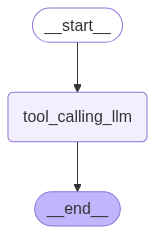

In [20]:
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm",END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [21]:
messages = graph.invoke({"messages": HumanMessage(content="Hello!")})
messages

{'messages': [HumanMessage(content='Hello!', additional_kwargs={}, response_metadata={}, id='10c3edc4-59cb-495c-b5f3-bdb3ec291a2c'),
  AIMessage(content='Hello! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run--6d8586de-9bcf-45d2-a67c-c949ebe20c38-0', usage_metadata={'input_tokens': 19, 'output_tokens': 10, 'total_tokens': 29, 'input_token_details': {'cache_read': 0}})]}

In [22]:
messages = graph.invoke({"messages": HumanMessage(content="Multiply 2 and 3")})
messages

{'messages': [HumanMessage(content='Multiply 2 and 3', additional_kwargs={}, response_metadata={}, id='5e9ae34c-4955-4c65-b3fb-b9f4038d3c0e'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'multiply', 'arguments': '{"a": 2.0, "b": 3.0}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run--0cf29299-e974-4e1b-a939-bd4047c49a98-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2.0, 'b': 3.0}, 'id': '1ca67fde-3af6-44f3-90f9-1efc1f972692', 'type': 'tool_call'}], usage_metadata={'input_tokens': 23, 'output_tokens': 5, 'total_tokens': 28, 'input_token_details': {'cache_read': 0}})]}